# Assignment 2 - Results Data - Covid Data 

# Name : Zeina Khaled Bassiouny 

# ID : 900212827

Import all necessary packages and libararies

In [286]:
import numpy as np
import pandas as pd
from scipy.stats import norm,t
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
from pandas.api.types import CategoricalDtype

# Part I - Results Data

In this part:
- Important observations/conclusions about the dataset.
- Compare between the probability of wins for the most three teams that played at home (non-neutral venues)
- Compare between the probability that Egypt would lose at home and away from all the matches it lost on only.  
- Compare between the probability that the home teams would win in friendly vs official tournaments
- Graphs of confidence intervals for the probabilities. 

Importing the dataset "results.csv" into python

In [139]:
data = pd.read_csv('results.csv')

In [140]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Here it is shown that the country that hosted the most number of matches is The United States

In [141]:
data['country'].value_counts().head(1)

United States    1237
Name: country, dtype: int64

<font color='purple'>Comparing the probabilities of wins for the most three teams that played at home (non-neutral venues)</font>

I will create a new column that shows whether a home team has won, lost, or drew in a match by finding the difference between the scores of home teams and scores of away teams

In [142]:
diff_scores_home = data['home_score']-data['away_score']

If difference > 0, home team won 

If difference < 0, home team lost

If difference = 0, home and away team tied

In [143]:
conditions = [(diff_scores_home>0),(diff_scores_home<0),(diff_scores_home==0)]
labels = ['Win','Lose','Draw']

Here I assigned the conditions with their corresponding labels

In [144]:
data['result'] = np.select(conditions,labels)

It is shown below that a new column called "result" has been added

In [145]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win


To find the estimated probabilities for a home team winning, losing, or drawing when playing at home, I will separate neutral and non-neutral venues, and choose non-neutral venues only.

In [146]:
data_non_neutral = data[data['neutral']==False]

The code below displays the three most repeated home teams observed in the dataset : England, Sweden, & France

I am comparing these three teams because the number of times they showed up in the observations is relatively similar and this leads to a much better, unbiased comparison

In [147]:
data_non_neutral['country'].value_counts().head(3)

England    499
Sweden     483
France     462
Name: country, dtype: int64

In [148]:
# 1. England

Separate England from all the other home teams 

In [149]:
non_neutral_England_home = data_non_neutral[data_non_neutral['country']=='England']

When making sure variable 'home_team' includes 'England' only, I found other countries. This is a mistake in the dataset

In [150]:
non_neutral_England_home['home_team'].value_counts()

England               464
Barawa                 11
Isle of Wight           9
Kernow                  8
Yorkshire               5
Sweden                  1
Parishes of Jersey      1
Name: home_team, dtype: int64

To fix the problem, I exculded from variable 'home_team' 'England' only

In [151]:
non_neutral_England_home = non_neutral_England_home[non_neutral_England_home['home_team']=='England']

In [152]:
non_neutral_England_home['home_team'].value_counts()

England    464
Name: home_team, dtype: int64

In [153]:
non_neutral_England_home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Lose
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,Win
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,Win


Here is the estimated probability that England would win when playing at home. Even though this probability is valid, we are not 100% sure this event will occur with probability 0.646552. A confidence interval that has the possible probabilities around 0.646552 is needed to establish more certainty. 

In [154]:
non_neutral_England_home['result'].value_counts(normalize = True).head(1)

Win    0.646552
Name: result, dtype: float64

Here is the number of times England won, lost, or drew when playing at home 

In [155]:
Eng = non_neutral_England_home['result'].value_counts()
Eng

Win     300
Draw    101
Lose     63
Name: result, dtype: int64

Below is the 95% confidence interval for the probability of England winning when playing at home

We can see that the estimated probability above (0.646552) lies between the interval below ((0.6030552883111224, 0.6900481599647397))

In [156]:
Eng_win_prob = proportion_confint(count = Eng[0], nobs = Eng.sum(), alpha=(1-0.95), method = 'normal')
Eng_win_prob

(0.6030552883111224, 0.6900481599647397)

I repeated the same steps for the other home teams

In [157]:
# 2. Sweden

In [158]:
non_neutral_Sweden_home = data_non_neutral[data_non_neutral['country']=='Sweden']

In [159]:
non_neutral_Sweden_home['home_team'].value_counts()

Sweden           460
Gotland            9
Sápmi              9
Åland Islands      5
Name: home_team, dtype: int64

In [160]:
non_neutral_Sweden_home = non_neutral_Sweden_home[non_neutral_Sweden_home['home_team']=='Sweden']

In [161]:
non_neutral_Sweden_home['home_team'].value_counts()

Sweden    460
Name: home_team, dtype: int64

In [162]:
non_neutral_Sweden_home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
224,7/12/1908,Sweden,Norway,11,3,Friendly,Gothenburg,Sweden,False,Win
296,6/18/1911,Sweden,Germany,2,4,Friendly,Solna,Sweden,False,Lose
298,9/17/1911,Sweden,Norway,4,1,Friendly,Solna,Sweden,False,Win
328,6/20/1912,Sweden,Hungary,2,2,Friendly,Gothenburg,Sweden,False,Draw
330,6/27/1912,Sweden,Finland,7,1,Friendly,Solna,Sweden,False,Win


In [163]:
non_neutral_Sweden_home['result'].value_counts(normalize = True)

Win     0.600000
Draw    0.204348
Lose    0.195652
Name: result, dtype: float64

In [164]:
Swed = non_neutral_Sweden_home['result'].value_counts()
Swed

Win     276
Draw     94
Lose     90
Name: result, dtype: int64

Below is the 95% confidence interval for the probability of Sweden winning when playing at home

In [165]:
Swed_win_prob = proportion_confint(count = Swed[0], nobs = Swed.sum(), alpha=(1-0.95), method = 'normal')
Swed_win_prob

(0.5552312677786161, 0.6447687322213839)

In [166]:
# 3. France 

In [167]:
non_neutral_France_home = data_non_neutral[data_non_neutral['country']=='France']

In [168]:
non_neutral_France_home['home_team'].value_counts()

France       443
Brittany       9
Corsica        8
Occitania      2
Name: home_team, dtype: int64

In [169]:
non_neutral_France_home = non_neutral_France_home[non_neutral_France_home['home_team']=='France']

In [170]:
non_neutral_France_home['home_team'].value_counts()

France    443
Name: home_team, dtype: int64

In [171]:
non_neutral_France_home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
166,2/12/1905,France,Switzerland,1,0,Friendly,Paris,France,False,Win
185,4/22/1906,France,Belgium,0,5,Friendly,Saint-Cloud,France,False,Lose
215,4/12/1908,France,Belgium,1,2,Friendly,Colombes,France,False,Lose
257,4/3/1910,France,Belgium,0,4,Friendly,Gentilly,France,False,Lose
277,1/1/1911,France,Hungary,0,3,Friendly,Maisons-Alfort,France,False,Lose


In [172]:
non_neutral_France_home['result'].value_counts(normalize = True)

Win     0.586907
Lose    0.212190
Draw    0.200903
Name: result, dtype: float64

In [173]:
Fran = non_neutral_France_home['result'].value_counts()
Fran

Win     260
Lose     94
Draw     89
Name: result, dtype: int64

Below is the 95% confidence interval for the probability of France winning when playing at home

In [174]:
Fran_win_prob = proportion_confint(count = 260, nobs = Fran.sum(), alpha=(1-0.95), method = 'normal')
Fran_win_prob 

(0.541055825404375, 0.6327590730154896)

Here is the process to display a graph that shows the three different 95% confidence intervals for the three different teams: England, Sweden, & France

In [175]:
ci_home_win = {}

In [176]:
ci_home_win['country'] = ['England','Sweden','France']

In [177]:
ci_home_win['lb'] = [Eng_win_prob[0],Swed_win_prob[0],Fran_win_prob[0]]

In [178]:
ci_home_win['ub'] = [Eng_win_prob[1],Swed_win_prob[1],Fran_win_prob[1]]

Create a table that has the lower bounds (lb) and upper bounds (ub) for the probabilities of winning for England, Sweden, & France

In [179]:
ci_home_win = pd.DataFrame(ci_home_win)
ci_home_win

,country,lb,ub
0,England,0.603055,0.690048
1,Sweden,0.555231,0.644769
2,France,0.541056,0.632759


The graph below shows that the 95% confidence intervals for the three countries are relatively similar in length and that England is the most probable to win at home. However, the three intervals intersect in many parts; for instance, Sweden and England intersect from around 0.60 till 0.65. 

The 95% confidence intervals of Sweden and France include almost the same probability ranges when comparing them with England's 95% confidence interval

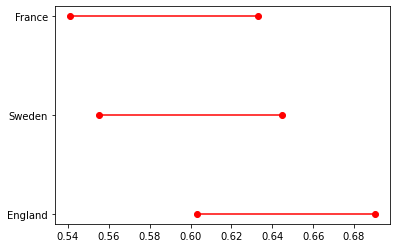

In [180]:
for lb,ub,y in zip (ci_home_win['lb'],ci_home_win['ub'], range(len(ci_home_win))):
    plt.plot((lb,ub),(y,y),'ro-')
    plt.yticks(range(len(ci_home_win)), list(ci_home_win['country']))

<font color='purple'>Comparing between the probability that Egypt would lose at home and away from all the matches it lost on only</font>

Separate Egypt from all other countries

In [181]:
non_neutral_Egy_home = data_non_neutral[data_non_neutral['country']=='Egypt']
non_neutral_Egy_home

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,Draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,Win
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,Win
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,Draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,Win
...,...,...,...,...,...,...,...,...,...,...
42165,3/29/2021,Egypt,Comoros,4,0,African Cup of Nations qualification,Cairo,Egypt,False,Win
42590,9/1/2021,Egypt,Angola,1,0,FIFA World Cup qualification,Cairo,Egypt,False,Win
42758,9/30/2021,Egypt,Liberia,2,0,Friendly,Alexandria,Egypt,False,Win
42812,10/8/2021,Egypt,Libya,1,0,FIFA World Cup qualification,Alexandria,Egypt,False,Win


In [182]:
non_neutral_Egy_home['home_team'].value_counts()

Egypt    258
Name: home_team, dtype: int64

Below are all the teams Egypt has played against when it played at home

In [183]:
non_neutral_Egy_home['away_team'].unique()

array(['Hungary', 'Israel', 'Greece', 'Norway', 'Yugoslavia', 'Italy',
       'Bulgaria', 'Portugal', 'Czechoslovakia', 'Austria', 'Brazil',
       'Algeria', 'Sudan', 'German DR', 'Libya', 'Tunisia', 'Uganda',
       'Zambia', 'Ivory Coast', 'DR Congo', 'Congo', 'Ethiopia', 'Kenya',
       'Nigeria', 'Morocco', 'Cameroon', 'Turkey', 'Iraq', 'Zimbabwe',
       'Canada', 'Madagascar', 'Mexico', 'England', 'Romania', 'Senegal',
       'Mozambique', 'Switzerland', 'Liberia', 'Finland', 'Chile',
       'Malawi', 'Denmark', 'South Korea', 'Colombia', 'Chad', 'Mali',
       'Poland', 'Angola', 'Kuwait', 'Togo', 'Ghana', 'Tanzania',
       'Namibia', 'Belarus', 'Mauritius', 'United Arab Emirates',
       'North Korea', 'Estonia', 'Burkina Faso', 'Qatar', 'South Africa',
       'Sweden', 'Rwanda', 'Trinidad and Tobago', 'Gabon', 'Belgium',
       'Benin', 'Uruguay', 'Burundi', 'Mauritania', 'Botswana',
       'Argentina', 'Djibouti', 'Guinea', 'Sierra Leone', 'Australia',
       'Niger', 'Cent

I separated the matches that Egypt has lost on when it played at home 

In [184]:
Egy_lose_home = non_neutral_Egy_home[non_neutral_Egy_home['result']=='Lose']
Egy_lose_home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
3425,1/16/1953,Egypt,Yugoslavia,1,3,Friendly,Cairo,Egypt,False,Lose
3587,11/13/1953,Egypt,Italy,1,2,FIFA World Cup qualification,Cairo,Egypt,False,Lose
3605,2/12/1954,Egypt,Hungary,0,3,Friendly,Cairo,Egypt,False,Lose
3898,12/23/1955,Egypt,Portugal,0,4,Friendly,Cairo,Egypt,False,Lose
4309,12/13/1957,Egypt,Czechoslovakia,1,2,Friendly,Cairo,Egypt,False,Lose


Below is the number of times Egypt lost at home (43 times)

In [185]:
nloses_home = Egy_lose_home['result'].value_counts()
nloses_home 

Lose    43
Name: result, dtype: int64

In [186]:
nloses_home = 43

To find Egypt's loses when playing away, I found the difference in the perspective of the away scores

In [187]:
diff_scores_away = data['away_score']-data['home_score']
conditions = [(diff_scores_away>0),(diff_scores_away<0),(diff_scores_away==0)]
labels = ['Win_away','Lose_away','Draw_away']
data['result'] = np.select(conditions,labels)

In [188]:
Egy_away = data[data['away_team']=='Egypt']
Egy_away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
819,6/22/1924,Austria,Egypt,3,1,Friendly,Vienna,Austria,False,Lose_away
824,6/29/1924,Sweden,Egypt,5,0,Friendly,Stockholm,Sweden,False,Lose_away
1144,6/14/1928,Netherlands,Egypt,1,2,Friendly,Rotterdam,Netherlands,False,Win_away
1146,6/28/1928,Luxembourg,Egypt,1,1,Friendly,Esch-sur-Alzette,Luxembourg,False,Draw_away
1670,4/6/1934,Israel,Egypt,1,4,FIFA World Cup qualification,Tel Aviv,Palestine,True,Win_away


Separating all Egypt's losses when playing away

In [119]:
Egy_lose_away = Egy_away[Egy_away['result']=='Lose_away']
Egy_lose_away

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
819,6/22/1924,Austria,Egypt,3,1,Friendly,Vienna,Austria,False,Lose_away
824,6/29/1924,Sweden,Egypt,5,0,Friendly,Stockholm,Sweden,False,Lose_away
3299,11/25/1951,Greece,Egypt,1,0,Friendly,Athens,Greece,False,Lose_away
3410,11/2/1952,Yugoslavia,Egypt,5,0,Friendly,Belgrade,Yugoslavia,False,Lose_away
3604,1/24/1954,Italy,Egypt,5,1,FIFA World Cup qualification,Milan,Italy,False,Lose_away
...,...,...,...,...,...,...,...,...,...,...
40043,6/19/2018,Russia,Egypt,3,1,FIFA World Cup,Saint Petersburg,Russia,False,Lose_away
40060,6/25/2018,Saudi Arabia,Egypt,2,1,FIFA World Cup,Volgograd,Russia,True,Lose_away
40740,3/26/2019,Nigeria,Egypt,1,0,Friendly,Asaba,Nigeria,False,Lose_away
43099,12/15/2021,Tunisia,Egypt,1,0,Arab Cup,Doha,Qatar,True,Lose_away


Below is the number of times Egypt lost playing away (95 times)

In [120]:
nloses_away = Egy_lose_away['result'].value_counts()
nloses_away 

Lose_away    95
Name: result, dtype: int64

In [121]:
nloses_away =  95

Below is the sum of all Egypt's losses (the losses at home and losses away)

In [122]:
x = nloses_away + nloses_home
x

138

Compute the 95% confidence interval for Egypt's loss at home

In [123]:
CI_Egy_home = proportion_confint(count = nloses_home, nobs = x, alpha=(1-0.95), method = 'normal')
CI_Egy_home

(0.23432160884031095, 0.3888667969567905)

Compute the 95% confidence interval Egypt's loss away

In [124]:
CI_Egy_away = proportion_confint(count = nloses_away, nobs = x, alpha=(1-0.95), method = 'normal')
CI_Egy_away

(0.6111332030432094, 0.765678391159689)

Here is a graph that compares the 95% confidence intervals for the probability of Egypt's losses when playing at home or away from all the matches it lost on

In [125]:
CI_Egy = {}

In [132]:
CI_Egy['result'] = ['Lose_home','Lose_away']

In [133]:
CI_Egy['lb'] = [CI_Egy_home[0],CI_Egy_away[0]]

In [134]:
CI_Egy['ub'] = [CI_Egy_home[1],CI_Egy_away[1]]

In [135]:
CI_Egypt = pd.DataFrame(CI_Egy)

In [136]:
CI_Egypt

,result,lb,ub
0,Lose_home,0.234322,0.388867
1,Lose_away,0.611133,0.765678


The graph below shows that the confidence intervals for both probabilities of playing at home and away are similar in length. However, the probability for Egypt to lose when playing away is much greater than the probability for the team to lose when playing at home. This demonstrates the effect of fans on the players' motivation. 

([<matplotlib.axis.YTick at 0x19ca5ad3d30>,
 [Text(0, 0, 'Lose_home'), Text(0, 1, 'Lose_away')])

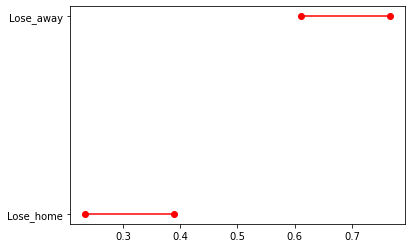

In [137]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(CI_Egypt['lb'],CI_Egypt['ub'],range(len(CI_Egypt))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(CI_Egypt)),list(CI_Egypt['result']))

<font color='purple'>Comparing between the probabilities that the home teams would win in friendly vs official tournaments</font>

Below I created a column "result" that shows whether a home team won, lost, or drew in a match

In [195]:
diff_scores_home = data['home_score']-data['away_score']
conditions = [(diff_scores_home>0),(diff_scores_home<0),(diff_scores_home==0)]
labels = ['Win','Lose','Draw']
data['result'] = np.select(conditions,labels)

Below I created a column "typematch" that indicates whether a match is friendly or official

In [196]:
conditions = [(data['tournament']=='Friendly'),(data['tournament']!='Friendly')]
values = ['Friendly','Official']
data['typematch'] = np.select(conditions, values)

In [191]:
data['typematch'].value_counts()

Official    25912
Friendly    17276
Name: typematch, dtype: int64

We can see that a new column "typematch" has been added

In [197]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,typematch
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win,Friendly


Here I created a contingency table for the draws, losses, and wins according to the type of match (friendly or official)

In [198]:
x = pd.crosstab(data['typematch'],data['result'],margins=True)
x

result,Draw,Lose,Win,All
typematch,,,,
Friendly,4329,4806,8141,17276
Official,5626,7418,12868,25912
All,9955,12224,21009,43188


Turn the contingency table into an array assigned to "x"

In [200]:
x = np.array(x)
x

array([[ 4329,  4806,  8141, 17276],
       [ 5626,  7418, 12868, 25912],
       [ 9955, 12224, 21009, 43188]], dtype=int64)

To find the 95% confidence interval for the probabilities of home teams winning in an Offical vs Friendly match 

In [203]:
CI_Friendly = proportion_confint(count=x[0,2],nobs=x[2,2],alpha=(1-0.95))
CI_Friendly

(0.3809128857381539, 0.394088304228051)

In [204]:
CI_Official = proportion_confint(count=x[1,2],nobs=x[2,2],alpha=(1-0.95))
CI_Official

(0.6059116957719489, 0.619087114261846)

To draw the corresponding confidence intervals graphs 

In [205]:
CI_matchtype = {}
CI_matchtype['matchtype'] = ['Offical','Friendly']
CI_matchtype['lb'] = [CI_Friendly[0],CI_Official[0]]
CI_matchtype['ub'] = [CI_Friendly[1],CI_Official[1]]
CI_matchtype_win = pd.DataFrame(CI_matchtype)
CI_matchtype_win

,matchtype,lb,ub
0,Offical,0.380913,0.394088
1,Friendly,0.605912,0.619087


The graph below shows that the probability for home teams to win on friendly matches is higher than the probability to win on official matches. 

Maybe because on friendly matches the players do not feel as stressed as they would when playing in an offical match, so they would win more

([<matplotlib.axis.YTick at 0x19ca568ab50>,
 [Text(0, 0, 'Offical'), Text(0, 1, 'Friendly')])

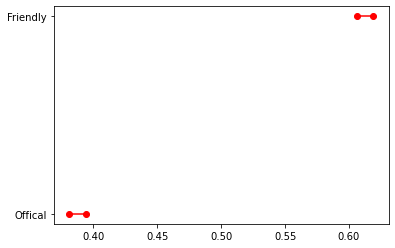

In [206]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(CI_matchtype_win['lb'],CI_matchtype_win['ub'],range(len(CI_matchtype_win))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(CI_matchtype_win)),list(CI_matchtype_win['matchtype']))

# Part II - Covid Data 

In this part:
- Important observations/conclusions about the dataset.
- Compare the 95% confidence intervals for the daily average deaths between Asia and Africa.  
- Compare the 95% confidence intervals for the daily average deaths and the ratio between deaths and confirmed cases according to income (High income vs Low income). 
- Compare the 95% confidence intervals for the average cases by month for India in 2020 and 2021. 
- Graphs of confidence intervals for the probabilities.

Import the data "covid_data" into python

In [207]:
df = pd.read_csv('covid_data.csv', encoding ='latin-1')

In [208]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


Below is a summary for the data of Covid. Some important things to take note of from here is that the maximum number of daily cases in all of the observations, regardless of income, population size, or country is 823225 and that the maximum number of deaths reached in a day was 8786. Also, the mean of daiy cases is 2353.722996 and the mean of daily deaths is 44.293024. 

In [210]:
df.describe()

,dcases,ddeaths,population
count,122843.000000,122843.000000,1.228430e+05
mean,2353.722996,44.293024,4.258179e+07
std,12256.414469,197.945108,1.521859e+08
min,0.000000,0.000000,1.800800e+04
25%,3.000000,0.000000,2.347706e+06
50%,98.000000,1.000000,9.746117e+06
75%,860.000000,13.000000,3.041786e+07
max,823225.000000,8786.000000,1.397715e+09


Below is the sum of the daily reported cases in 2020 and 2021

In [211]:
c = df['dcases'].sum()
c

289138394

Below is the sum of the daily reported deaths in 2020 and 2021

In [214]:
d = df['ddeaths'].sum()
d

5441088

Below is the ratio between deaths and confirmed cases in the whole dataset

Here the ratio is small and this means that the number of deaths is insignificant when compared to the number of cases

In [215]:
d/c

0.01881828256955733

<font color='green'>Compare the 95% confidence intervals for the daily average deaths between Asia and Africa</font>

The reason why I am comparing between Asia and Africa is because they are the two largest continents in terms of population and area

In [224]:
#1. Asia

Below I separated the continent 'Asia' from all the other continents

In [217]:
Asia = df[df['continent']=='Asia']
Asia.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


The standard deviation of the daily deaths for Asia 

In [218]:
std_Asia = Asia['ddeaths'].std()
std_Asia

192.1301580956554

The estimated average (mean) of the daily deaths for Asia

In [220]:
mean_Asia = Asia['ddeaths'].mean()
mean_Asia

40.51686332508118

The size/length of the variable "ddeaths" for Asia

In [222]:
len_Asia = np.size(Asia['ddeaths'])
len_Asia

31103

95% confidence interval for the average daily deaths in both 2020 and 2021 for Asia

Since I am trying to find the confidence interval of the average and we have an unknown variance, I used the t interval

In [226]:
CI_ddeaths_Asia = scipy.stats.t.interval(0.95, len_Asia - 1, mean_Asia, std_Asia/np.sqrt(len_Asia - 1))
CI_ddeaths_Asia

(38.381526577905404, 42.65220007225696)

In [227]:
#2. Africa

Below I separated the continent 'Africa' from all the other continents

In [228]:
Africa = df[df['continent']=='Africa']
Africa.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
677,2020-03-20,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,1,0,31825295,Fri,Mar
678,2020-03-21,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,1,0,31825295,Sat,Mar
679,2020-03-22,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,0,0,31825295,Sun,Mar
680,2020-03-23,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,1,0,31825295,Mon,Mar
681,2020-03-24,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,0,0,31825295,Tue,Mar


The standard deviation of the daily deaths for Africa

In [229]:
std_Africa = Africa['ddeaths'].std()
std_Africa

31.04342390551242

The estimated average (mean) of the daily deaths for Africa

In [230]:
mean_Africa = Africa['ddeaths'].mean()
mean_Africa

6.588286183925945

The size/length of the variable "ddeaths" for Africa

In [231]:
len_Africa = np.size(Africa['ddeaths'])
len_Africa

34677

95% confidence interval for the average daily deaths in both 2020 and 2021 for Africa

In [232]:
CI_ddeaths_Africa = scipy.stats.t.interval(0.95, len_Africa - 1, mean_Africa, std_Africa/np.sqrt(len_Africa - 1))
CI_ddeaths_Africa

(6.2615340981609915, 6.915038269690898)

Compare between the 95% confidence intervals of the average daily deaths for Asia and Africa in a graph

In [233]:
ddeaths_cont = {}
ddeaths_cont['continent'] = ['Asia','Africa']
ddeaths_cont['lb'] = [CI_ddeaths_Asia[0],CI_ddeaths_Africa[0]]
ddeaths_cont['ub'] = [CI_ddeaths_Asia[1],CI_ddeaths_Africa[1]]
CI_ddeaths_cont = pd.DataFrame(ddeaths_cont)
CI_ddeaths_cont

,continent,lb,ub
0,Asia,38.381527,42.652200
1,Africa,6.261534,6.915038


Below is the graph showing the 95% confidence intervals for the daily average deaths in Asia and Africa during 2020 and 2021 combined. We see that the average daily deaths for Africa is much less than the average daily deaths for Asia. Also, the confidence interval for Asia is wider than that of Africa. The reason behind this can be because the sample size in Africa is larger or because of a smaller margin of error. 

([<matplotlib.axis.YTick at 0x19ca6f66520>,
 [Text(0, 0, 'Asia'), Text(0, 1, 'Africa')])

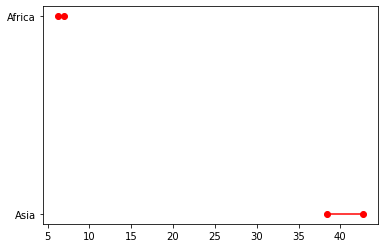

In [234]:
for lb,ub,y in zip(CI_ddeaths_cont['lb'],CI_ddeaths_cont['ub'],range(len(CI_ddeaths_cont))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(CI_ddeaths_cont)),list(CI_ddeaths_cont['continent']))

<font color='green'>Compare the 95% confidence intervals for the daily average deaths and the ratio between deaths and confirmed cases according to income (High income vs Low income)</font>

In [246]:
# Low Income

Separate "Low income" from all other incomes

In [235]:
L_income = df[df['income']=='Low income']
L_income.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


The countries associated with a low income

In [236]:
L_income['country'].value_counts()

Nepal                       707
Afghanistan                 677
Togo                        666
Burkina Faso                662
Congo - Kinshasa            661
Ethiopia                    659
Guinea                      659
Rwanda                      658
Central African Republic    657
Benin                       656
Somalia                     656
Tanzania                    656
Gambia                      655
Liberia                     655
Chad                        653
Niger                       652
Haiti                       652
Madagascar                  652
Uganda                      651
Syria                       650
Mozambique                  650
Mali                        647
Guinea-Bissau               647
Sierra Leone                641
Burundi                     641
Malawi                      639
South Sudan                 636
Yemen                       631
Tajikistan                  610
Name: country, dtype: int64

Sum of reported daily cases for countries with low income

In [238]:
cl = L_income['dcases'].sum()
cl

2429562

Sum of daily deaths for countries with low income

In [241]:
dl = L_income['ddeaths'].sum()
dl

48431

Ratio between the daily deaths and the daily cases for countries with low income

In [242]:
dl/cl

0.01993404572511424

The standard deviation of the daily deaths for countries with low income

In [248]:
std_L = L_income['ddeaths'].std()
std_L

12.912590584822501

The average (mean) daily deaths for countries with low income

In [249]:
mean_L = L_income['ddeaths'].mean()
mean_L

2.557615124630334

The size/length of variable "ddeaths" for countries with low income

In [250]:
len_L = np.size(L_income['ddeaths'])
len_L

18936

Below is the 95% confidence interval of the average daily deaths for the countries with low income

In [251]:
CI_ddeaths_L = scipy.stats.t.interval(0.95, len_L - 1, mean_L , std_L/np.sqrt(len_L - 1))
CI_ddeaths_L

(2.373683426953564, 2.741546822307104)

In [247]:
# High Income

Separate "High income" from all other incomes

In [252]:
H_income = df[df['income']=='High income']
H_income.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
1992,2020-03-02,AND,Andorra,High income,Europe & Central Asia,Europe,1,0,77142,Mon,Mar
1993,2020-03-03,AND,Andorra,High income,Europe & Central Asia,Europe,0,0,77142,Tue,Mar
1994,2020-03-04,AND,Andorra,High income,Europe & Central Asia,Europe,0,0,77142,Wed,Mar
1995,2020-03-05,AND,Andorra,High income,Europe & Central Asia,Europe,0,0,77142,Thu,Mar
1996,2020-03-06,AND,Andorra,High income,Europe & Central Asia,Europe,0,0,77142,Fri,Mar


The countries associated with a high income

In [253]:
H_income['country'].value_counts()

Japan                   710
South Korea             710
United States           710
Singapore               709
Canada                  709
France                  708
Australia               706
Germany                 705
United Arab Emirates    703
Finland                 703
Italy                   701
United Kingdom          701
Spain                   700
Sweden                  700
Belgium                 697
Israel                  680
Chile                   678
Oman                    677
Kuwait                  677
Bahrain                 677
Croatia                 676
Switzerland             676
Austria                 676
Norway                  675
Greece                  675
Netherlands             674
Estonia                 674
Denmark                 674
Iceland                 673
New Zealand             673
Qatar                   672
San Marino              672
Lithuania               672
Luxembourg              672
Monaco                  672
Ireland             

Sum of reported daily cases for countries with high income

In [257]:
ch = H_income['dcases'].sum()
ch

136132124

Sum of daily deaths for countries with high income

In [258]:
dh = H_income['ddeaths'].sum()
dh

1952834

Ratio between the daily deaths and the daily cases for countries with high income

In [256]:
dh/ch

0.014345137228594186

The standard deviation of the daily deaths for countries with high income

In [261]:
std_H = H_income['ddeaths'].std()
std_H

222.3114694475608

The average (mean) daily deaths for countries with high income

In [262]:
mean_H = H_income['ddeaths'].mean()
mean_H

50.32817895984743

The size/length of variable "ddeaths" for countries with high income

In [263]:
len_H = np.size(H_income['ddeaths'])
len_H

38802

Below is the 95% confidence interval of the average daily deaths for the countries with high income

In [264]:
CI_ddeaths_H = scipy.stats.t.interval(0.95, len_H - 1, mean_H , std_H/np.sqrt(len_H - 1))
CI_ddeaths_H

(48.11609274841139, 52.540265171283465)

Graph the 95% confidence intervals for the average daily deaths according to income (high income vs low income)

In [265]:
ddeaths_income = {}
ddeaths_income['income'] = ['Low Income','High Income']
ddeaths_income['lb'] = [CI_ddeaths_L[0],CI_ddeaths_H[0]]
ddeaths_income['ub'] = [CI_ddeaths_L[1],CI_ddeaths_H[1]]
CI_ddeaths_inc = pd.DataFrame(ddeaths_income)
CI_ddeaths_inc

,income,lb,ub
0,Low Income,2.373683,2.741547
1,High Income,48.116093,52.540265


I thought that countries with higher income would have a lower daily death average, but surprisingly countries with low income had a much lower daily death average when comparing to countries with high income. Also, the confidence interval for countries associated with high income is wider than the interval for countries with low income

([<matplotlib.axis.YTick at 0x19ca732f7f0>,
 [Text(0, 0, 'Low Income'), Text(0, 1, 'High Income')])

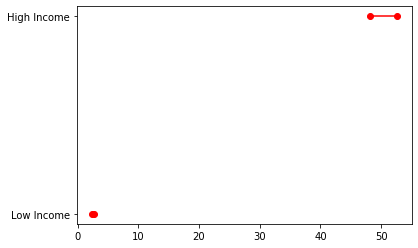

In [267]:
for lb,ub,y in zip(CI_ddeaths_inc['lb'],CI_ddeaths_inc['ub'],range(len(CI_ddeaths_inc))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(CI_ddeaths_inc)),list(CI_ddeaths_inc['income']))

<font color='green'>Find and compare between the 95% confidence intervals for the average cases by month for India in 2020 and 2021</font>

Indicating that the months are ordered in the order of "cats"

In [289]:
cats = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

Separate India from all the other countries

In [291]:
India = df[df['country'] == 'India']

For each month, find the mean, standard deviation, and length/size of the daily cases 

In [292]:
stats = India.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})

In [298]:
stats = pd.DataFrame(stats)
stats

,mean,std,size
month,,,
Jan,14269.757576,6482.719062,33
Feb,6221.631579,6589.542141,57
Mar,17916.419355,22066.831712,62
Apr,116279.500000,137715.333493,60
May,147835.822581,156159.070842,62
Jun,43857.700000,37231.180478,60
Jul,37978.983871,8960.893487,62
Aug,50809.661290,15576.946155,62
Sep,59621.333333,28873.530060,60


In [299]:
stats.columns = ['mean','std','size']

Create a function that evaluates the lowerbound of the 95% confidence interval for the average daily cases 

In [300]:
def get_ci_lb(x, alpha=0.05):
    sample_s = np.std(x)
    sample_mean = np.mean(x)
    sample_size = len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

Create a function that evaluates the upperbound of the 95% confidence interval for the average daily cases 

In [301]:
def get_ci_ub(x, alpha=0.05):
    sample_s = np.std(x)
    sample_mean = np.mean(x)
    sample_size = len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [302]:
x = India['dcases']

Lowerbound of the confidence interval

In [305]:
get_ci_lb(x)

44032.38633467612

Upperbound of the confidence interval

In [307]:
get_ci_ub(x)

55288.351557061775

Two new columns were added showing the lowerbound and upperbound for the average daily cases in India

In [309]:
CI_dcases = statsm = India.groupby("month").agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsm

dcases                                                  
                mean            std size      get_ci_lb      get_ci_ub
month                                                                 
Jan     14269.757576    6482.719062   33   11971.085348   16568.429803
Feb      6221.631579    6589.542141   57    4473.190704    7970.072454
Mar     17916.419355   22066.831712   62   12312.493397   23520.345313
Apr    116279.500000  137715.333493   60   80703.857009  151855.142991
May    147835.822581  156159.070842   62  108178.844086  187492.801076
Jun     43857.700000   37231.180478   60   34239.866232   53475.533768
Jul     37978.983871    8960.893487   62   35703.343024   40254.624718
Aug     50809.661290   15576.946155   62   46853.857664   54765.464916
Sep     59621.333333   28873.530060   60   52162.509604   67080.157062
Oct     38558.145161   23693.595216   62   32541.098627   44575.191695
Nov     26494.816667   16729.044007   60   22173.246352   30816.386982
Dec     17559.725806   10467.380049   62   14901.509007   20217.942606

In [310]:
statsm.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [311]:
statsm.columns = ['mean','std','size','lb','ub']

Here I turned the identifying index to be the months

In [314]:
statsm['month'] = statsm.index

In [315]:
statsm.head()

,mean,std,size,lb,ub,month
month,,,,,,
Jan,14269.757576,6482.719062,33,11971.085348,16568.429803,Jan
Feb,6221.631579,6589.542141,57,4473.190704,7970.072454,Feb
Mar,17916.419355,22066.831712,62,12312.493397,23520.345313,Mar
Apr,116279.500000,137715.333493,60,80703.857009,151855.142991,Apr
May,147835.822581,156159.070842,62,108178.844086,187492.801076,May


To find the confidence intervals for 2020 and 2021 separately, I indicated that the variable "date" in the dataset is actually a date because in python it is an object

In [329]:
df['date'] = pd. to_datetime(df['date'],format='%Y-%m-%d')

In [330]:
df['year'] = pd. DatetimeIndex(df['date']). year

I compute now, by country, by year, by month the following statistics on the daily Covid cases: mean, std, size, CI(95%) LB, and UB

In [331]:
statsdcases = df.groupby(['country','year','month']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [332]:
statsdcases.head(24)

dcases                                 \
                               mean         std  size    get_ci_lb   
country     year month                                               
Afghanistan 2020 Jan            NaN         NaN   NaN          NaN   
                 Feb       0.833333    2.041241   6.0    -1.308818   
                 Mar       5.258065   10.871883  31.0     1.270225   
                 Apr      55.366667   40.385627  30.0    40.286426   
                 May     430.741935  266.692078  31.0   332.918491   
                 Jun     542.166667  278.939504  30.0   438.008944   
                 Jul     167.193548  124.566560  31.0   121.502165   
                 Aug      52.258065   54.725355  31.0    32.184642   
                 Sep      36.866667   28.389815  30.0    26.265735   
                 Oct      63.870968   32.698361  31.0    51.877112   
                 Nov     162.700000   79.090149  30.0   133.167253   
                 Dec     197.258065   74.022955  31.0   170.106225   
            2021 Jan      86.870968   40.486822  31.0    72.020281   
                 Feb      24.678571   16.537395  28.0    18.266039   
                 Mar      23.870968   17.589281  31.0    17.419167   
                 Apr     109.700000   57.199680  30.0    88.341288   
                 May     390.096774  261.671086  31.0   294.115045   
                 Jun    1560.700000  539.104887  30.0  1359.394927   
                 Jul     919.193548  468.370325  31.0   747.393926   
                 Aug     195.677419  158.879281  31.0   137.400029   
                 Sep      65.133333   46.887049  30.0    47.625421   
                 Oct      34.709677   24.771211  31.0    25.623524   
                 Nov      34.633333   28.842597  30.0    23.863331   
                 Dec      25.645161   16.706383  31.0    19.517211   

                                     
                          get_ci_ub  
country     year month               
Afghanistan 2020 Jan            NaN  
                 Feb       2.975485  
                 Mar       9.245904  
                 Apr      70.446908  
                 May     528.565379  
                 Jun     646.324389  
                 Jul     212.884932  
                 Aug      72.331487  
                 Sep      47.467598  
                 Oct      75.864823  
                 Nov     192.232747  
                 Dec     224.409904  
            2021 Jan     101.721654  
                 Feb      31.091104  
                 Mar      30.322768  
                 Apr     131.058712  
                 May     486.078503  
                 Jun    1762.005073  
                 Jul    1090.993171  
                 Aug     253.954810  
                 Sep      82.641245  
                 Oct      43.795831  
                 Nov      45.403336  
                 Dec      31.773112

Transform the data index to columns

In [333]:
statsdcases = statsdcases.reset_index()

Now, filter the of India data in 2021

In [334]:
statsInd = statsdcases[(statsdcases['country']=='India') & (statsdcases['year']==2021)]
statsInd

country  year month         dcases                                      \
                                   mean            std  size      get_ci_lb   
1812   India  2021   Jan   15190.354839    5511.578065  31.0   13168.691683   
1813   India  2021   Feb   12665.392857    2329.287053  28.0   11762.189628   
1814   India  2021   Mar   35787.870968   18167.230223  31.0   29124.077123   
1815   India  2021   Apr  231443.466667  105568.028204  30.0  192023.717090   
1816   India  2021   May  290647.580645   86201.026855  31.0  259028.788725   
1817   India  2021   Jun   74553.000000   29283.040341  30.0   63618.533034   
1818   India  2021   Jul   40135.161290    4175.353072  31.0   38603.629419   
1819   India  2021   Aug   37258.741935    6253.440232  31.0   34964.961540   
1820   India  2021   Sep   31862.066667    7294.804140  30.0   29138.142034   
1821   India  2021   Oct   16745.387097    3248.474839  31.0   15553.836906   
1822   India  2021   Nov   10365.400000    1619.731280  30.0    9760.582400   
1823   India  2021   Dec    8542.032258    4446.852621  31.0    6910.913548   

                     
          get_ci_ub  
1812   17212.017995  
1813   13568.596086  
1814   42451.664813  
1815  270863.216243  
1816  322266.372566  
1817   85487.466966  
1818   41666.693162  
1819   39552.522331  
1820   34585.991299  
1821   17936.937287  
1822   10970.217600  
1823   10173.150968

In [335]:
statsInd.columns

MultiIndex([('country',          ''),
            (   'year',          ''),
            (  'month',          ''),
            ( 'dcases',      'mean'),
            ( 'dcases',       'std'),
            ( 'dcases',      'size'),
            ( 'dcases', 'get_ci_lb'),
            ( 'dcases', 'get_ci_ub')],
           )

In [336]:
statsInd.columns = ['country','year','month','mean','std','size','lb','ub']

Below is the graph for the average daily cases for India in 2021 by month

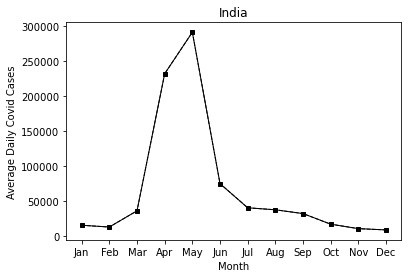

In [338]:
plt.plot( 'month', 'mean', data=statsInd, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsInd, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily Covid Cases")
plt.title("India")
plt.show()

Upperbounds and lowerbounds for each month in the graph above

In [339]:
ci_lb_ub = [statsInd['lb'],statsInd['ub']]

In [340]:
n = np.abs(ci_lb_ub - statsInd['mean'].to_numpy())

Below I added the 95% confidence intervals for the average daily cases per month

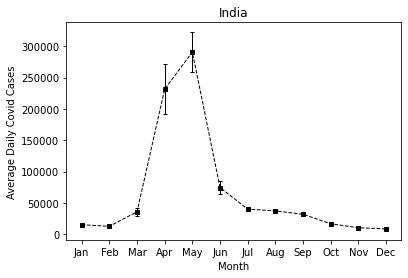

In [344]:
plt.errorbar('month', 'mean',  yerr = n, data = statsInd,marker = 's', capsize = 2,
             color = 'black', markersize = 4, linewidth = 1, linestyle = '--')
plt.xlabel("Month")
plt.ylabel("Average Daily Covid Cases")
plt.title("India")
plt.show()

To compare between 2020 and 2021

In [345]:
statsInd_21 = statsdcases[(statsdcases['country']=='India')
                       & (statsdcases['year']==2021)]
statsInd_21

country  year month         dcases                                      \
                                   mean            std  size      get_ci_lb   
1812   India  2021   Jan   15190.354839    5511.578065  31.0   13168.691683   
1813   India  2021   Feb   12665.392857    2329.287053  28.0   11762.189628   
1814   India  2021   Mar   35787.870968   18167.230223  31.0   29124.077123   
1815   India  2021   Apr  231443.466667  105568.028204  30.0  192023.717090   
1816   India  2021   May  290647.580645   86201.026855  31.0  259028.788725   
1817   India  2021   Jun   74553.000000   29283.040341  30.0   63618.533034   
1818   India  2021   Jul   40135.161290    4175.353072  31.0   38603.629419   
1819   India  2021   Aug   37258.741935    6253.440232  31.0   34964.961540   
1820   India  2021   Sep   31862.066667    7294.804140  30.0   29138.142034   
1821   India  2021   Oct   16745.387097    3248.474839  31.0   15553.836906   
1822   India  2021   Nov   10365.400000    1619.731280  30.0    9760.582400   
1823   India  2021   Dec    8542.032258    4446.852621  31.0    6910.913548   

                     
          get_ci_ub  
1812   17212.017995  
1813   13568.596086  
1814   42451.664813  
1815  270863.216243  
1816  322266.372566  
1817   85487.466966  
1818   41666.693162  
1819   39552.522331  
1820   34585.991299  
1821   17936.937287  
1822   10970.217600  
1823   10173.150968

In [346]:
statsInd_20 = statsdcases[(statsdcases['country']=='India')
                       & (statsdcases['year']==2020)]
statsInd_20

country  year month        dcases                                    \
                                  mean           std  size     get_ci_lb   
1800   India  2020   Jan      0.500000      0.707107   2.0     -5.853102   
1801   India  2020   Feb      0.068966      0.257881  29.0     -0.029127   
1802   India  2020   Mar     44.967742     56.751202  31.0     24.151233   
1803   India  2020   Apr   1115.533333    500.681724  30.0    928.575705   
1804   India  2020   May   5024.064516   1863.490219  31.0   4340.530785   
1805   India  2020   Jun  13162.400000   3638.887501  30.0  11803.617076   
1806   India  2020   Jul  35822.806452  11671.764895  31.0  31541.568524   
1807   India  2020   Aug  64360.580645   8646.870624  31.0  61188.882894   
1808   India  2020   Sep  87380.600000   6971.220497  30.0  84777.503486   
1809   India  2020   Oct  60370.903226  12149.922297  31.0  55914.275747   
1810   India  2020   Nov  42624.233333   5337.656128  30.0  40631.119779   
1811   India  2020   Dec  26577.419355   5911.932548  31.0  24408.904989   

                    
         get_ci_ub  
1800      6.853102  
1801      0.167058  
1802     65.784251  
1803   1302.490962  
1804   5707.598247  
1805  14521.182924  
1806  40104.044379  
1807  67532.278396  
1808  89983.696514  
1809  64827.530704  
1810  44617.346888  
1811  28745.933721

In [347]:
statsInd_20.columns = ['country','year','month','mean','std','size','lb','ub']
statsInd_21.columns = ['country','year','month','mean','std','size','lb','ub']

The x axis will display the name of the months

In [348]:
x = statsInd_20['month']
x

1800    Jan
1801    Feb
1802    Mar
1803    Apr
1804    May
1805    Jun
1806    Jul
1807    Aug
1808    Sep
1809    Oct
1810    Nov
1811    Dec
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [349]:
y1 = statsInd_20['mean']
y1

1800        0.500000
1801        0.068966
1802       44.967742
1803     1115.533333
1804     5024.064516
1805    13162.400000
1806    35822.806452
1807    64360.580645
1808    87380.600000
1809    60370.903226
1810    42624.233333
1811    26577.419355
Name: mean, dtype: float64

In [350]:
y2 = statsInd_21['mean']
y2

1812     15190.354839
1813     12665.392857
1814     35787.870968
1815    231443.466667
1816    290647.580645
1817     74553.000000
1818     40135.161290
1819     37258.741935
1820     31862.066667
1821     16745.387097
1822     10365.400000
1823      8542.032258
Name: mean, dtype: float64

In [351]:
ci_20 = [statsInd_20['lb'], statsInd_20['ub']]
err20 = np.abs(ci_20 - statsInd_20['mean'].to_numpy())

In [352]:
ci_21 = [statsInd_21['lb'], statsInd_21['ub']]
err21 = np.abs(ci_21 - statsInd_21['mean'].to_numpy())

Below is the graph for the average daily cases by month in both 2020 (black) and 2021 (red) with the confidence interval of the average in each month

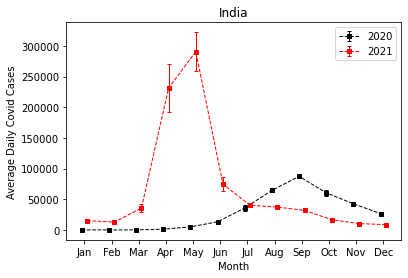

In [354]:
from matplotlib.transforms import Affine2D
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsInd_20,marker='s', capsize=2,
             color='black', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsInd_21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily Covid Cases")
plt.title("India")
plt.show()

In 2020, India experienced a mean that is steadily increasing from Jan till Sep. The highest average daily cases happened in Sep. Then, a steady decrease occured after Sep till Dec. The confidence intervals for the average daily cases in each month is narrow. 

In 2021, India experienced in the beginning almost no cases, but then from Mar till Jun an intense increase of cases occured. The highest average daily cases occured in May. Afterwards, an intense decrease happened around mid May till Jun and then with a steady decrease from Jun till Dec. The confidence intervals in April and May are much more wider than those in any other month. 

Around July, India experienced almost the same average daily cases. Overall, the difference between the average daily cases for the two years is not significantly different except from Mar till Jun. 